# CH3133 - Computational Practicum - Q1 - Lecture coding 7

Import packages.

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

## The shooting method

We model an arbritary system on the domain $x\in [0,1]$.


$\frac{d^2y}{dx^2}=4(y-x)$

The following boundary conditions are given.

$y(0)=0,\;y(1)=2$

To solve the BVP with the shooting method we convert the ODE (2nd order) to the canonical form (1st order) using variable substitution.

$y_1\equiv y,\;y_2\equiv \frac{dy}{dx}$

The resulting ODE system:

$\frac{dy_1}{dx}=y_2$

$\frac{dy_2}{dx}=4(y_1-x)$

The new boundary conditions:

$y_1(0)=0,\;y_1(1)=2$

### Manual guesses

Define canonical ODE system.

In [2]:
def dy(t, y):
    y1, y2 = y
    dy1 = y2
    dy2 = 4*(y1-t)
    return dy1, dy2

Define initial conditions.

In [3]:
y0_guess1 = [0,1]
y0_guess2 = [0,0]
y0_guess3 = [0,1.55]

Solve IVP with guess.

In [4]:
results_guess1 = sp.integrate.solve_ivp(dy, (0, 1), y0_guess1)
x_guess1 = results_guess1.t
y1_guess1 = results_guess1.y[0]
results_guess2 = sp.integrate.solve_ivp(dy, (0, 1), y0_guess2)
x_guess2 = results_guess2.t
y1_guess2 = results_guess2.y[0]
results_guess3 = sp.integrate.solve_ivp(dy, (0, 1), y0_guess3)
x_guess3 = results_guess3.t
y1_guess3 = results_guess3.y[0]

Plot results.

/tmp/ipykernel_1624/2383641411.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


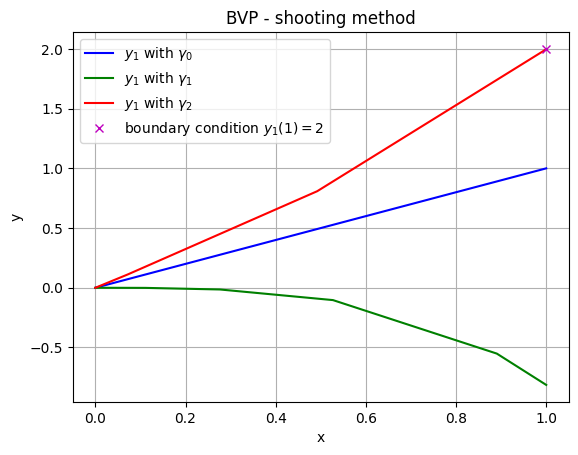

In [7]:
fig, ax = plt.subplots()
ax.plot(x_guess1, y1_guess1, label="$y_1$ with $\gamma_0$", color="b")
ax.plot(x_guess2, y1_guess2, label="$y_1$ with $\gamma_1$", color="g")
ax.plot(x_guess3, y1_guess3, label="$y_1$ with $\gamma_2$", color="r")
ax.plot(1, 2, label="boundary condition $y_1(1)=2$", linestyle="", marker="x", color="m")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP - shooting method")
ax.legend()
ax.grid()
fig.show()

### Algorithmic approach

Define parameters.

In [37]:
# domain
x_0 = 0
x_f = 1

# boundary conditions
y1_0 = 0
y1_f = 2

Define canonical ODE system.

In [38]:
def dy(t, y):
    y1, y2 = y
    dy1 = y2
    dy2 = 4*(y1-t)
    return dy1, dy2

Find the optimal guess using a root-finding method (see lecture 2).

In [39]:
def cost_function(guess, x_0, x_f, y1_0, y1_f):
    
    sol = sp.integrate.solve_ivp(dy, (x_0, x_f), [y1_0, guess])
    y1_f_guess = sol.y[0,-1]
    return y1_f_guess - y1_f

initial_guess = 1
root_result = sp.optimize.root_scalar(cost_function, args=(x_0, x_f, y1_0, y1_f), bracket=[-10,10], x0=initial_guess)
opt_guess = root_result.root

Insert the optimal guess in the BVP formulated as an IVP.

In [40]:
ivp_result = sp.integrate.solve_ivp(dy, (x_0, x_f), [y1_0, opt_guess])

Plot the results.

/tmp/ipykernel_1624/391894950.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


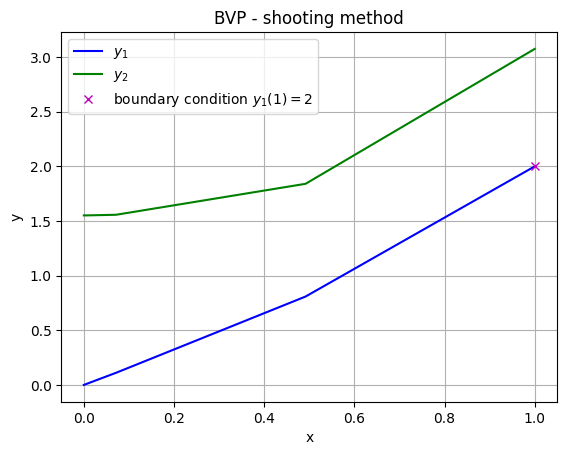

In [56]:
fig, ax = plt.subplots()
ax.plot(ivp_result.t, ivp_result.y[0], label="$y_1$", color="b")
ax.plot(ivp_result.t, ivp_result.y[1], label="$y_2$", color="g")
ax.plot(1, 2, label="boundary condition $y_1(1)=2$", linestyle="", marker="x", color="m")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP - shooting method")
ax.legend()
ax.grid()
fig.show()

## SciPy's `solve_bvp`

Define parameters.

In [43]:
# domain
x = np.linspace(0,1,101)
y_guess = np.zeros((2,len(x)))

# boundary conditions
y1_0 = 0
y1_f = 2

Define canonical ODE system.

In [44]:
def dy(t, y):
    y1, y2 = y
    dy1 = y2
    dy2 = 4*(y1-t)
    return dy1, dy2

Define boundary conditions.

In [45]:
def bc(ya, yb):
    return np.array([ya[0],yb[0]-2])

Solve BVP with SciPy's `solve_bvp`.

In [50]:
bvp_result = sp.integrate.solve_bvp(dy, bc, x, y_guess)

Plot the results.

/tmp/ipykernel_1624/3703384429.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


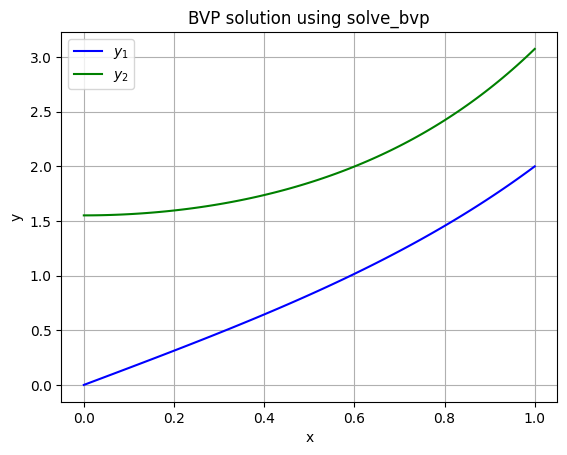

In [54]:
fig, ax = plt.subplots()
ax.plot(bvp_result.x, bvp_result.y[0], label="$y_1$", color="b")
ax.plot(bvp_result.x, bvp_result.y[1], label="$y_2$", color="g")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("BVP solution using solve_bvp")
ax.legend()
ax.grid()
fig.show()